# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Trương Công Gia Phát
- MSSV: 21127667
- Lớp: 21CLC04

# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 10 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 10 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)
X_train

,Gender,10percentage,12percentage,CollegeTier,Degree,collegeGPA,CollegeCityTier,English,Logical,Quant,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,2,87.80,84.00,1,1,73.82,1,650,665,810,...,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889
1,1,57.00,64.50,2,1,65.00,0,440,435,210,...,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859
2,1,77.33,85.17,2,1,61.94,0,485,475,505,...,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875
3,1,84.30,86.00,1,1,80.40,1,675,620,635,...,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805
4,2,82.00,75.00,2,1,64.30,1,575,495,365,...,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,1,91.00,73.00,2,2,85.00,0,555,445,485,...,-1,-1,-1,-1,-1,0.8192,1.4368,-0.0537,-1.81790,0.8183
2244,2,75.00,73.00,2,1,70.00,1,505,485,445,...,-1,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284
2245,2,84.00,77.00,2,1,75.20,0,345,585,395,...,-1,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024
2246,1,91.40,65.56,2,1,73.19,0,385,425,485,...,-1,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603


# Cài đặt hàm

In [ ]:
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):
        return self.w


    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)
    
def mae(y, y_hat):
    return np.mean(np.abs(y.ravel() - y_hat.ravel()))


def select_attribute(threshold, corr_matrix):
    corrs = np.abs(corr_matrix)
    selected_corrs = corrs[abs_corrs > threshold].index.values.tolist()
    return selected_corrs

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [20]:
X_train_a = train.iloc[:, :11]
model = OLSLinearRegression().fit(X_train_a, y_train)
model.get_params()

0    -22756.512821
1       804.503156
2      1294.654565
3    -91781.897531
4     23182.388679
5      1437.548672
6     -8570.661985
7       147.858299
8       152.888476
9       117.221846
10    34552.286221
dtype: float64

In [21]:
X_test_a = X_test.drop(X_test.iloc[:,11:23], axis = 1)
y_hat = model.predict(X_test_a)
print('MAE:', mae(y_test, y_hat))

MAE: 104863.77754032993


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -22756.513*X1 +  804.503*X2 + 1294.654*X3 - 91781.897*X4 + 23182.389*X5 + 1437.549*X6 - 8570.662*X7 + 147.858*X8 + 152.888*X9 + 117.222*X10 + 34552.286*X11

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [44]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

train_b = train.iloc[:, 18:-1]
k = 5
list_mae = []
attributes = train_b.columns.values
for name in attributes: 
    X_train_col = pd.Series.to_frame(train_b[name])
    y_train_col = y_train
    #train_X, test_X, train_y, test_y = train_test_split(X_train_col, y_train_col, shuffle = True, test_size=0.2)
    X_train_b = np.split(X_train_col, [450, 900, 1350, 1700])
    y_train_b = np.split(y_train, [450, 900, 1350, 1700])
    MAE = 0
    for i in range(k):
        xtest = pd.DataFrame()
        ytest = pd.DataFrame()
        lr = LinearRegression()
        lr.fit(X_train_b[i], y_train_b[i])
        for j in range(k):
            if j == i: continue
            xtest = pd.concat([xtest, X_train_b[j]])
            ytest = pd.concat([ytest, y_train_b[j]])
        y_pred = lr.predict(xtest)
        ytest = ytest.to_numpy()
        MAE += mean_absolute_error(ytest, y_pred)
    list_mae.append([name, MAE / k])


sorted_mae = sorted(list_mae, key = lambda x: x[1])
min_mae = sorted_mae[0]
print('Thuộc tính tốt nhất:', min_mae[0])
prediction = pd.DataFrame(sorted_mae, columns=['Thuộc tính', 'MAE'])
prediction

    

Thuộc tính tốt nhất: nueroticism


,Thuộc tính,MAE
0,nueroticism,124529.853028
1,agreeableness,125087.697550
2,extraversion,125170.086999
3,conscientiousness,125523.337223
4,openess_to_experience,125565.728015


In [35]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_train_best = X_train[min_mae[0]].values.reshape(-1, 1)
regressor = LinearRegression()
best_feature_model = regressor.fit(X_train_best, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[-16021.49366179]
304647.55255226186


In [36]:
y_hat = best_feature_model.predict(X_test[min_mae[0]].values.reshape(-1, 1))
print('MAE: ' , mean_absolute_error(y_test, y_hat))

MAE:  119361.91739987815


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -16021.494*X + 304647.552

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [43]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu
train_c = train.iloc[:, 7:10]
k = 5
list_mae = []
attributes = train_c.columns.values
for name in attributes: 
    X_train_col = pd.Series.to_frame(train_c[name])
    y_train_col = y_train
    #train_X, test_X, train_y, test_y = train_test_split(X_train_col, y_train_col, shuffle = True, test_size=0.2)
    X_train_c = np.split(X_train_col, [450, 900, 1350, 1700])
    y_train_c = np.split(y_train, [450, 900, 1350, 1700])
    MAE = 0
    for i in range(k):
        xtest = pd.DataFrame()
        ytest = pd.DataFrame()
        lr = LinearRegression()
        lr.fit(X_train_c[i], y_train_c[i])
        for j in range(k):
            if j == i: continue
            xtest = pd.concat([xtest, X_train_c[j]])
            ytest = pd.concat([ytest, y_train_c[j]])
        y_pred = lr.predict(xtest)
        ytest = ytest.to_numpy()
        MAE += mean_absolute_error(ytest, y_pred)
    list_mae.append([name, MAE/k])


sorted_mae = sorted(list_mae, key=lambda x: x[1])
min_mae = sorted_mae[0]
print('Thuộc tính tốt nhất:', min_mae[0])

prediction = pd.DataFrame(sorted_mae, columns=['Thuộc tính', 'MAE'])
prediction

Thuộc tính tốt nhất: Quant


,Thuộc tính,MAE
0,Quant,118279.364517
1,Logical,120686.840058
2,English,121522.381223


In [8]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_train_best = X_train[min_mae[0]].values.reshape(-1, 1)
regressor = LinearRegression()
best_feature_model = regressor.fit(X_train_best, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[368.85246384]
117759.72931230717


In [9]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
y_hat = best_feature_model.predict(X_test[min_mae[0]].values.reshape(-1, 1))
print('MAE: ' , mean_absolute_error(y_test, y_hat))

MAE:  108814.05968837196


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 368.852*X + 117759.729

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

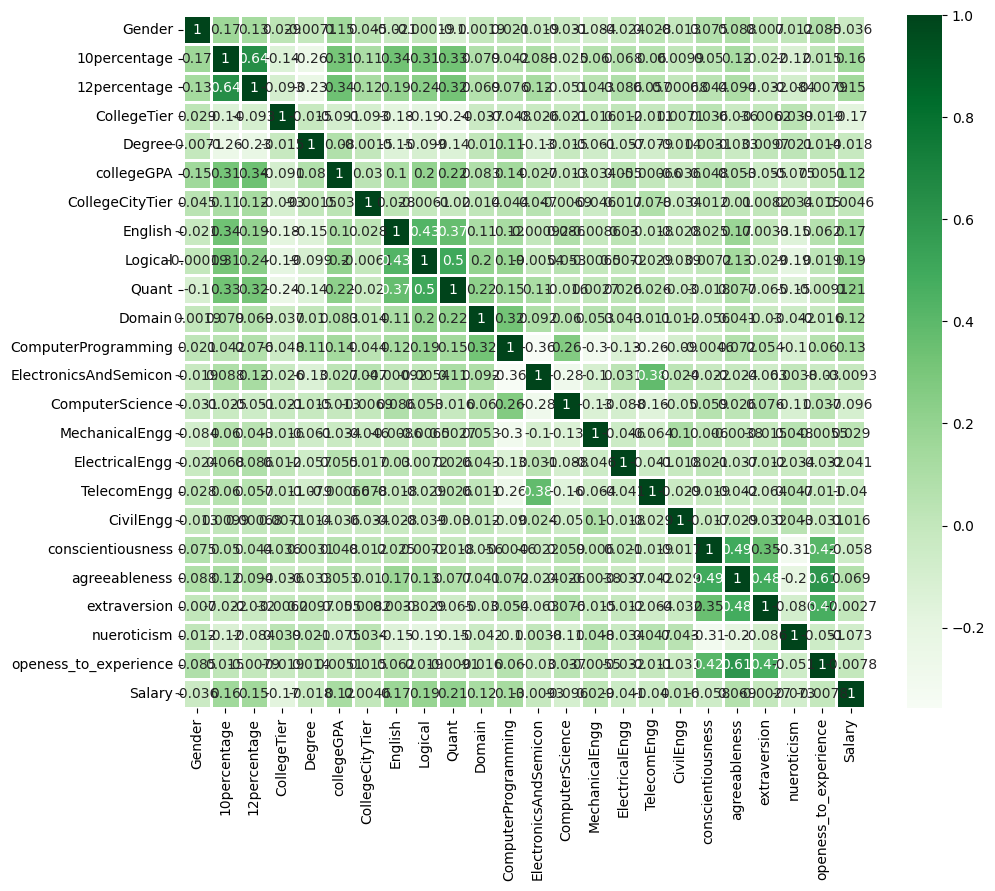

In [13]:
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_matrix,cmap="Greens", annot=True, linewidths=2, ax = ax)
correlations = X_train.corr()


In [42]:
quant_corr = correlations.iloc[:, 9]
quant_corr = quant_corr.sort_values(ascending=False)
a = select_attribute(0.1, quant_corr)
a = a[:5]
X_traind0 = X_train[a].copy()
X_testd0 = X_test[a].copy()
X_traind0
#Quant correlation

,Quant,Logical,English,10percentage,12percentage
0,810,665,650,87.80,84.00
1,210,435,440,57.00,64.50
2,505,475,485,77.33,85.17
3,635,620,675,84.30,86.00
4,365,495,575,82.00,75.00
...,...,...,...,...,...
2243,485,445,555,91.00,73.00
2244,445,485,505,75.00,73.00
2245,395,585,345,84.00,77.00
2246,485,425,385,91.40,65.56


In [15]:
nueroticism_corr = correlations.iloc[:, 21]
nueroticism_corr = nueroticism_corr.sort_values(ascending=False)
a = select_attribute(0.1, nueroticism_corr)
a = a[:5]
X_traind1 = X_train[a].copy()
X_testd1 = X_test[a].copy()
X_testd1
#nueroticism correlation

,nueroticism,ComputerProgramming,ComputerScience,10percentage,Quant
0,-0.7603,395,-1,61.63,215
1,0.5323,505,-1,72.40,655
2,0.4442,435,-1,79.00,595
3,0.6530,435,407,73.00,415
4,0.9066,505,-1,92.00,500
...,...,...,...,...,...
745,-1.5021,395,-1,78.00,500
746,0.0623,-1,-1,88.53,565
747,-1.3753,445,469,87.00,345
748,-1.1128,495,-1,66.80,555


In [16]:
computerProgramming_corr = correlations.iloc[:, 11]
computerProgramming_corr = computerProgramming_corr.sort_values(ascending=False)
a = select_attribute(0.1, computerProgramming_corr)
a = a[:5]
X_traind2 = X_train[a].copy()
X_testd2 = X_test[a].copy()
X_testd2
#ComputerProgramming correlation

,ComputerProgramming,Domain,ComputerScience,Logical,Quant
0,395,0.450877,-1,415,215
1,505,0.819417,-1,625,655
2,435,0.600057,-1,515,595
3,435,0.622643,407,480,415
4,505,0.819417,-1,440,500
...,...,...,...,...,...
745,395,0.053160,-1,470,500
746,-1,0.960603,-1,585,565
747,445,0.842248,469,495,345
748,495,0.793581,-1,435,555


## Thử nghiệm, so sánh các mô hình

In [47]:
list_maed = []
k = 5
X_train_d = np.split(X_traind0, [450, 900, 1350, 1700])
y_train_d = np.split(y_train, [450, 900, 1350, 1700])
MAE0 = 0
MAE1 = 0
MAE2 = 0
for i in range(k):
        xtest = pd.DataFrame()
        ytest = pd.DataFrame()
        lr = LinearRegression()
        lr.fit(X_train_d[i], y_train_d[i])
        for j in range(k):
            if j == i: continue
            xtest = pd.concat([xtest, X_train_d[j]])
            ytest = pd.concat([ytest, y_train_d[j]])
        y_pred = lr.predict(xtest)
        ytest = ytest.to_numpy()
        MAE0 += mean_absolute_error(ytest, y_pred)
list_maed.append(['Dataframe 1', MAE0/k])
#--------------------------------------------------------

X_train_d = np.split(X_traind1, [450, 900, 1350, 1700])
y_train_d = np.split(y_train, [450, 900, 1350, 1700])
for i in range(k):
        xtest = pd.DataFrame()
        ytest = pd.DataFrame()
        lr = LinearRegression()
        lr.fit(X_train_d[i], y_train_d[i])
        for j in range(k):
            if j == i: continue
            xtest = pd.concat([xtest, X_train_d[j]])
            ytest = pd.concat([ytest, y_train_d[j]])
        y_pred = lr.predict(xtest)
        ytest = ytest.to_numpy()
        MAE1 += mean_absolute_error(ytest, y_pred)
list_maed.append(['Dataframe 2', MAE1/k])
#--------------------------------------------------------

X_train_d = np.split(X_traind2, [450, 900, 1350, 1700])
y_train_d = np.split(y_train, [450, 900, 1350, 1700])
for i in range(k):
        xtest = pd.DataFrame()
        ytest = pd.DataFrame()
        lr = LinearRegression()
        lr.fit(X_train_d[i], y_train_d[i])
        for j in range(k):
            if j == i: continue
            xtest = pd.concat([xtest, X_train_d[j]])
            ytest = pd.concat([ytest, y_train_d[j]])
        y_pred = lr.predict(xtest)
        ytest = ytest.to_numpy()
        MAE2 += mean_absolute_error(ytest, y_pred)
list_maed.append(['Dataframe 3', MAE2/k])


sorted_maed = sorted(list_maed, key=lambda x: x[1])
prediction = pd.DataFrame(sorted_maed, columns=['Dataframe', 'MAE'])
prediction


,Dataframe,MAE
0,Dataframe 2,114299.261779
1,Dataframe 3,115780.413385
2,Dataframe 1,116102.195231


In [38]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
lr = OLSLinearRegression().fit(X_traind1, y_train)
lr.get_params()

0   -9448.587536
1     139.608167
2    -163.242924
3    1790.679852
4     259.252020
dtype: float64

In [39]:
y_hat = lr.predict(X_testd1)
print('MAE:', mae(y_test, y_hat))

MAE: 104029.88954523273


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -9448.587*X1 + 139.608*X2 -163.243*X3 + 1790.680*X4 + 259.252*X5